## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pymaceuticals = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_pymaceuticals.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_pymaceuticals["Mouse ID"].count()
print("There are " + str(num_mice) + " instances in this dataset.")

num_unique_mice = len(combined_pymaceuticals["Mouse ID"].unique())
print("There are " + str(num_unique_mice) + " unique mice in this dataset.")

There are 1893 instances in this dataset.
There are 249 unique mice in this dataset.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 

print("\nDuplicate Mice: ")
duplicate_mice = combined_pymaceuticals[combined_pymaceuticals.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


Duplicate Mice: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


@TODO there are only five duplicates?

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_pymaceuticals.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

@TODO okay to just use drop_duplicates?

In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_mice_df["Mouse ID"].count()
print("The number of instances in the clean DataFrame is " + str(num_mice_clean))

The number of instances in the clean DataFrame is 1888


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the
# tumor volume for each regimen.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# group by each drug regimen
regimen_groups = clean_mice_df.groupby("Drug Regimen")

# summary statistics for each drug regimen
mean1 = regimen_groups['Tumor Volume (mm3)'].mean()
median1 = regimen_groups['Tumor Volume (mm3)'].median()
variance1 = regimen_groups['Tumor Volume (mm3)'].var()
standard_deviation1 = regimen_groups['Tumor Volume (mm3)'].std()
SEM1 = regimen_groups['Tumor Volume (mm3)'].sem()

# put summary results into a single dataframe
summary_stats1 = pd.DataFrame({'Mean of tumor volume': mean1,
                              'Median of tumor volume': median1,
                              'Variance of tumor volume': variance1,
                              'Standard Deviation of tumor volume': standard_deviation1,
                              'SEM of tumor volume': SEM1})
summary_stats1

,Mean of tumor volume,Median of tumor volume,Variance of tumor volume,Standard Deviation of tumor volume,SEM of tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the
# tumor volume for each regimen.

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

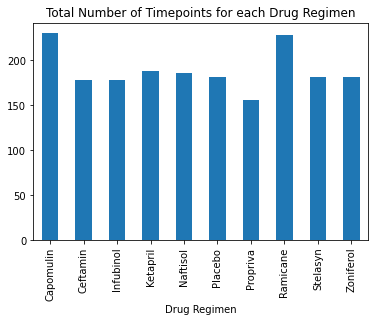

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# group by drug regimen and then get the total number of timepoints for each regimen
regimen_timepoints = clean_mice_df.groupby('Drug Regimen')['Timepoint'].count()

# plot the results using a bar chart
pandas_timepoints_bar = regimen_timepoints.plot(kind='bar', x='Drug Regimen', y='Total Number of Timepoints',
                                               title='Total Number of Timepoints for each Drug Regimen')

@TODO check understanding for_bar charts

@TODO total number of timepoints for_each drug regimen?

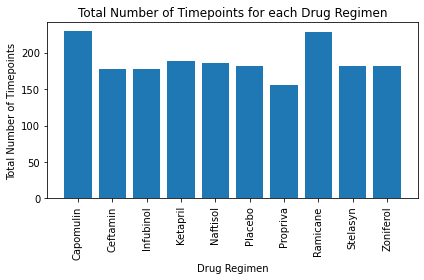

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# create tick locations and x axis using the number of unique drug regimens
x_axis = np.arange(len(clean_mice_df['Drug Regimen'].unique()))
tick_locations = [x for x in x_axis]

# count the number of instances for each regimen before reseting the index
counting_df = clean_mice_df.groupby('Drug Regimen').count().reset_index()

# formatting for bar chart
plt.title('Total Number of Timepoints for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')

# create bar chart using the above data
plt.bar(x_axis, counting_df['Timepoint'], align='center')
plt.xticks(tick_locations, counting_df['Drug Regimen'], rotation='vertical')
plt.tight_layout()
plt.show()

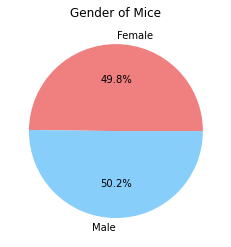

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# use the duplicated method to isolate only one of each mouse
unique_mouse_id = combined_pymaceuticals[combined_pymaceuticals.duplicated('Mouse ID')]
unique_mice_df = combined_pymaceuticals.drop_duplicates('Mouse ID', keep='first')

# group by gender and then count how many mice are male or female
gender_mice_count = unique_mice_df.groupby('Sex').count()

# create a pie chart with the results
pandas_gender_pie = gender_mice_count.plot(kind='pie', y='Mouse ID', autopct='%1.1f%%',
                                           colors=['lightcoral', 'lightskyblue'],
                                           title='Gender of Mice', legend=False, ylabel='')

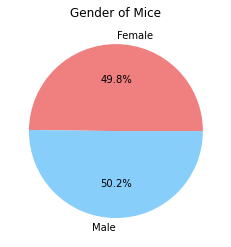

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# use the counts from above (using pandas) and reset the index
gender_mice_count_pyplot = gender_mice_count.reset_index()

# formatting
plt.title('Gender of Mice')

# create a pie chart using the data from above
plt.pie(gender_mice_count_pyplot['Mouse ID'], labels=gender_mice_count_pyplot['Sex'], colors=['lightcoral', 'lightskyblue'],
       autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# first, make a dataframe with only data from the four most promising treatment regimens
best_regimens = clean_mice_df.loc[(clean_mice_df['Drug Regimen'] == 'Capomulin') |
                                 (clean_mice_df['Drug Regimen'] == 'Ramicane') |
                                 (clean_mice_df['Drug Regimen'] == 'Infubinol') |
                                 (clean_mice_df['Drug Regimen'] == 'Ceftamin')]

# sort the values to get the last timepoint for each mouse
# we need to group by mouse id, get the first (largest timepoint) instance and then reset the index
group_mice_tps = best_regimens.sort_values('Timepoint', ascending=False).groupby('Mouse ID').first().reset_index()
group_mice_tps

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset

# go through each regimen and get the list of tumor volumes from each one
for regimen in treatments:
    tumor_vol_list.append(group_mice_tps.loc[group_mice_tps['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].to_list())

# create empty list to store the bounds information
bounds = []

# for each regimen, calculate the upper and lower bounds using the interquartile range
for regimen in tumor_vol_list:
    quartiles = np.percentile(regimen, [25, 50, 75], interpolation='midpoint')
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5*iqr)
    upper_bound = quartiles[2] + (1.5*iqr)
    bounds.append([lower_bound, upper_bound])
bounds

# Determine outliers using upper and lower bounds
# go through each regimen, looking for outliers
for i in range(4):
    
    # make a dataframe with the outliers
    outliers = group_mice_tps.loc[(group_mice_tps['Drug Regimen'] == treatments[i]) & 
                                ((group_mice_tps['Tumor Volume (mm3)'] < bounds[i][0]) |
                                 (group_mice_tps['Tumor Volume (mm3)'] > bounds[i][1]))]
    
    # only print out statements if there is an outlier
    if not outliers.empty:
        print(f"The following mice are outliers for the treatment {treatments[i]} because their Tumor Volume is either ")
        print(f"less than {bounds[i][0]} or")
        print(f"greater than {bounds[i][1]}")
        display(outliers)


The following mice are outliers for the treatment Infubinol because their Tumor Volume is either 
less than 36.83290494999999 or
greater than 82.74144559000001


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
15,c326,Infubinol,Female,18,25,5,36.321346,0


Text(0, 0.5, 'Tumor volume (mm3)')

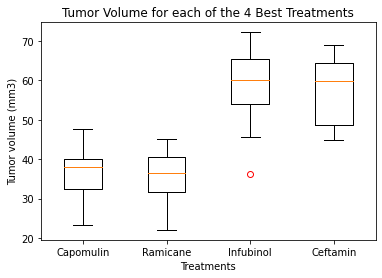

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# create a dataframe that has the four regimens as column names with the list of final tumor volumes as the data
# can do this because each regimen has the same number of unique mice
tumor_vols = pd.DataFrame({'Capomulin': tumor_vol_list[0],
                        'Ramicane': tumor_vol_list[1],
                           'Infubinol': tumor_vol_list[2],
                           'Ceftamin': tumor_vol_list[3]})

# highlight the outliers by making them red
flierprops = dict(marker='o', color='red', markeredgecolor='red')

# create the box and whiskers plot
fig, ax = plt.subplots()
ax.boxplot(tumor_vols, flierprops=flierprops)

# formatting
ax.set_xticklabels(treatments)
plt.title("Tumor Volume for each of the 4 Best Treatments")
ax.set_xlabel("Treatments")
ax.set_ylabel("Tumor volume (mm3)")

## Line and Scatter Plots

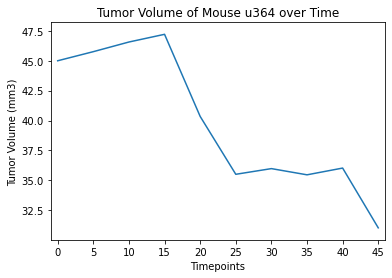

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# first, create a dataframe with only the mice treated with Capomulin
capomulin = clean_mice_df.loc[clean_mice_df['Drug Regimen'] == 'Capomulin']

# get a random mouse
mouse = capomulin.sample(n=1)['Mouse ID'].to_list()

# get all of the data on our chosen random mouse
mouse_over_time = capomulin.loc[capomulin['Mouse ID'] == mouse[0]]

# create lists of timepoints and tumor volumes to plot with
mouse_tumor_vol = mouse_over_time['Tumor Volume (mm3)'].to_list()
mouse_timepoint = mouse_over_time['Timepoint'].to_list()

# formatting
plt.title("Tumor Volume of Mouse " + mouse[0] + " over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

# since the timepoints are in increments of 5, we want to make the ticks at these timepoints 
plt.xticks(np.arange(min(mouse_timepoint), max(mouse_timepoint)+1, 5.0))

# customize the limits of the graph based on the mouse
plt.xlim(min(mouse_timepoint)-1, max(mouse_timepoint)+1)
plt.ylim(min(mouse_tumor_vol)-1, max(mouse_tumor_vol)+1)

# plot the line plot
plt.plot(mouse_timepoint, mouse_tumor_vol)
plt.show()

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

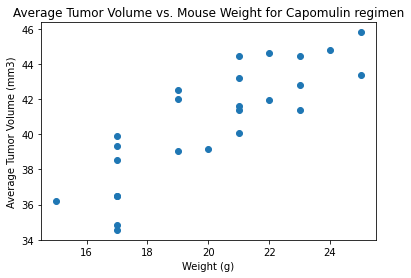

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# group by mouse id for mice on the capomulin regimen
# get the average tumor volume and weight for each mouse
# note: the weight does not change, so we can use the mean function on it
capomulin_scatter = capomulin.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# plot the scatter plot
plt.scatter(capomulin_scatter.iloc[:,0], capomulin_scatter.iloc[:,1])

# formatting
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# get the series for the weights and average tumor volumes
weight = capomulin_scatter.iloc[:,0]
avg_vol = capomulin_scatter.iloc[:,1]

# calculate the correlation coefficient between the two series
correlation = st.pearsonr(weight, avg_vol)
print(f"The correlation coefficient between mouse weight and average tumor colume for the Capomulin regimen is {round(correlation[0], 2)}.")

The correlation coefficient between mouse weight and average tumor colume for the Capomulin regimen is 0.84.


Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin regimen')

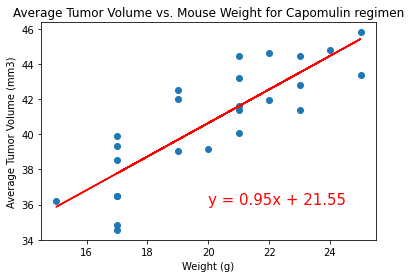

In [21]:
# calculate the linear regression model

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = weight * slope + intercept

# create the line equation string to go on the plot
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the linear regression line
plt.scatter(weight, avg_vol)
plt.plot(weight, regress_values, "r-")

# formatting
plt.annotate(line_equation, (20,36), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin regimen')